<h1> Feature Scaling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
%matplotlib inline
print("Setup complete.")

Setup complete.


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
data = pd.read_csv('new_data.csv')
data

,age,equip_220601,infrast_220601,Is_sim4g_220601,is_4g_220601,call_flow_220601,call_flow_220301,call_flow_211201,call_days_220601,call_freight_220601,data_usage_220601,data_usage_220301,data_usage_211201,data_days_220601,data_days_220301,data_days_211201,data_freight_220601,mix_freight_220601,mix_days_220601,card_times_220601,topup_times_220601,card_money_220601,card_money_220301,card_money_211201,topup_money_220601,topup_money_220301,highest_data_usage,average_data_usage,low_lim,up_lim
0,55 < X <= 65,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
1,45 < X <= 55,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
2,0 < X <= 15,0,0,0,0,0.0,0.0,0.0,0,0.0,7.214373e+06,7.303721e+06,6.149872e+06,30,31.0,27.0,0.0,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.303721e+06,6.901545e+06,-4.676102e+09,7.793503e+09
3,0 < X <= 15,1,1,1,1,1516.0,1454.0,0.0,9,795.0,5.078318e+09,4.439038e+09,2.759413e+09,21,31.0,9.0,15000.0,65502.0,30,2.0,1.0,110000.0,250000.0,0.0,10000.0,50000.0,1.833063e+10,7.793503e+09,-4.676102e+09,7.793503e+09
4,25 < X <= 35,0,0,0,0,0.0,0.0,0.0,0,0.0,2.742797e+06,1.199704e+06,2.779214e+06,25,27.0,25.0,25000.0,25000.0,25,1.0,1.0,100000.0,0.0,0.0,50000.0,0.0,2.791023e+06,1.894354e+06,-4.676102e+09,7.793503e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199968,75 < X,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
199969,45 < X <= 55,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
199970,65 < X <= 75,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
199971,45 < X <= 55,0,0,0,0,0.0,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09


In [5]:
data.describe()

,equip_220601,infrast_220601,Is_sim4g_220601,is_4g_220601,call_flow_220601,call_flow_220301,call_flow_211201,call_days_220601,call_freight_220601,data_usage_220601,data_usage_220301,data_usage_211201,data_days_220601,data_days_220301,data_days_211201,data_freight_220601,mix_freight_220601,mix_days_220601,card_times_220601,topup_times_220601,card_money_220601,card_money_220301,card_money_211201,topup_money_220601,topup_money_220301,highest_data_usage,average_data_usage,low_lim,up_lim
count,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,1.999730e+05,1.999730e+05,1.999730e+05,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,1.999730e+05,1.999730e+05,1.999730e+05,1.999730e+05
mean,0.646677,0.629225,0.936796,0.495307,1327.240042,1535.736894,1560.295445,10.999365,12984.356706,1.253088e+09,1.100744e+09,8.076444e+08,10.946488,10.985423,10.358578,21356.826644,52239.932664,22.508924,1.002590,0.429821,49801.681727,52998.162752,45531.282723,12445.044581,12316.383212,4.680679e+09,1.951890e+09,-4.676102e+09,7.793503e+09
std,0.478003,0.483014,0.243329,0.499979,1674.374258,1929.697942,1952.919036,10.025204,17075.883070,2.041614e+09,1.798645e+09,1.324179e+09,12.777128,13.099914,13.015423,35275.613489,60837.106438,10.842911,1.319063,0.759122,68734.449238,71018.857604,61807.713287,20861.629662,20827.438281,7.160848e+09,3.032723e+09,1.614575e-02,0.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
25%,0.000000,0.000000,1.000000,0.000000,17.000000,36.000000,44.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2650.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-4.676102e+09,7.793503e+09
50%,1.000000,1.000000,1.000000,0.000000,548.000000,635.000000,653.000000,9.000000,4372.500000,9.685000e+04,7.999800e+04,4.078900e+04,3.000000,3.000000,2.000000,0.000000,27019.340000,30.000000,1.000000,0.000000,10000.000000,20000.000000,10000.000000,0.000000,0.000000,4.625714e+07,1.688028e+07,-4.676102e+09,7.793503e+09
75%,1.000000,1.000000,1.000000,1.000000,1991.000000,2301.000000,2332.000000,19.000000,20504.500000,2.031327e+09,1.775615e+09,1.297708e+09,28.000000,28.000000,27.000000,38461.540000,87857.810000,30.000000,2.000000,1.000000,100000.000000,100000.000000,80000.000000,20000.000000,20000.000000,7.514979e+09,3.117401e+09,-4.676102e+09,7.793503e+09
max,1.000000,1.000000,1.000000,1.000000,4952.000000,5698.500000,5764.000000,30.000000,51261.250000,5.078318e+09,4.439038e+09,3.244271e+09,30.000000,31.000000,31.000000,96153.850000,215669.525000,30.000000,5.000000,2.500000,250000.000000,250000.000000,200000.000000,50000.000000,50000.000000,1.878745e+10,7.793503e+09,-4.676102e+09,7.793503e+09


In [6]:
data.drop(['low_lim', 'up_lim'], axis = 1, inplace = True)

In [7]:
data_4g = data[data['is_4g_220601'] == 1]
data_non4g = data[data['is_4g_220601'] == 0]

In [8]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        categorical_columns.append(column)
    else:
        if data[column].dtype != 'O':
            numerical_columns.append(column)

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nguye\AppData\Local\Temp\ipykernel_6416\3901577026.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


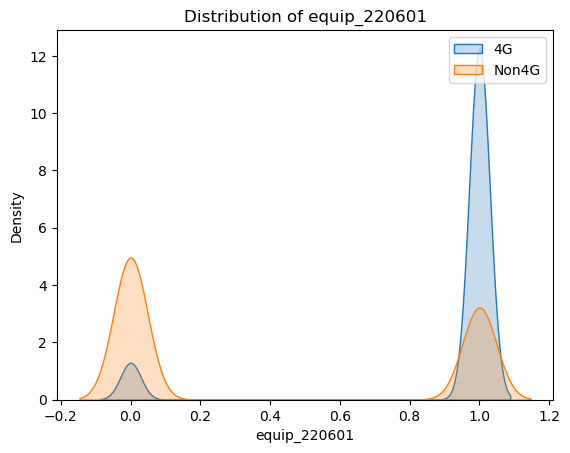

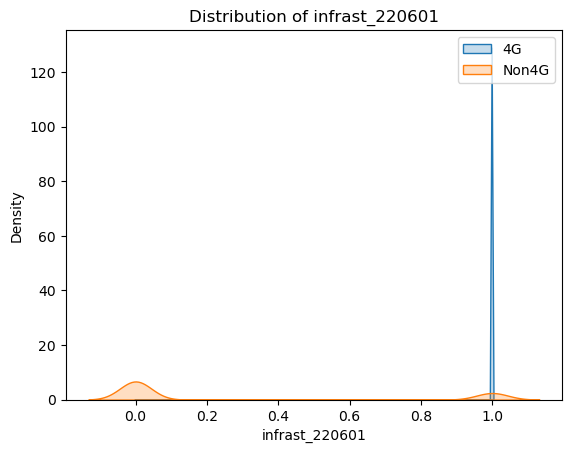

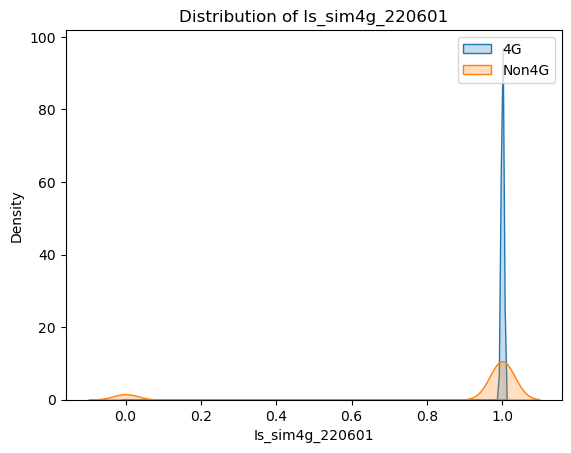

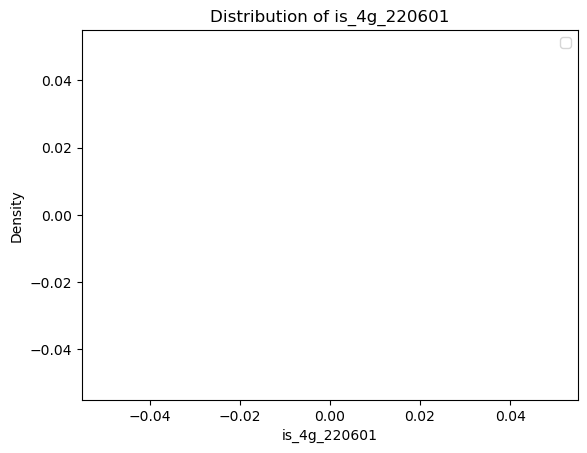

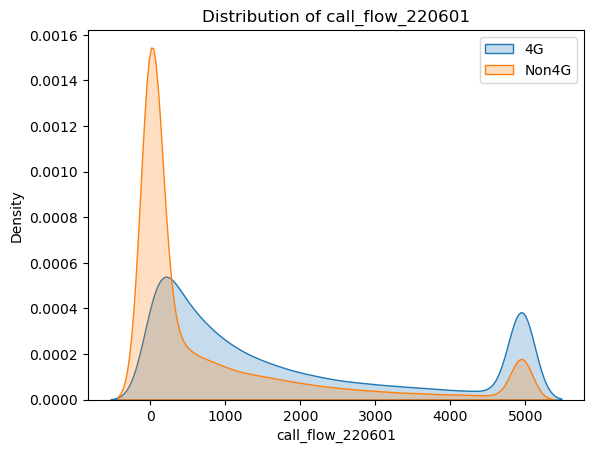

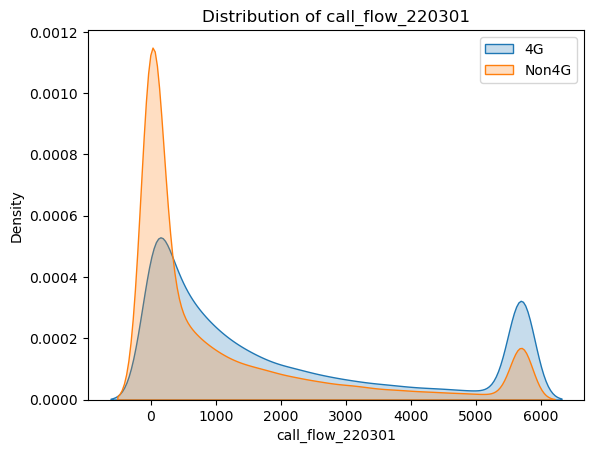

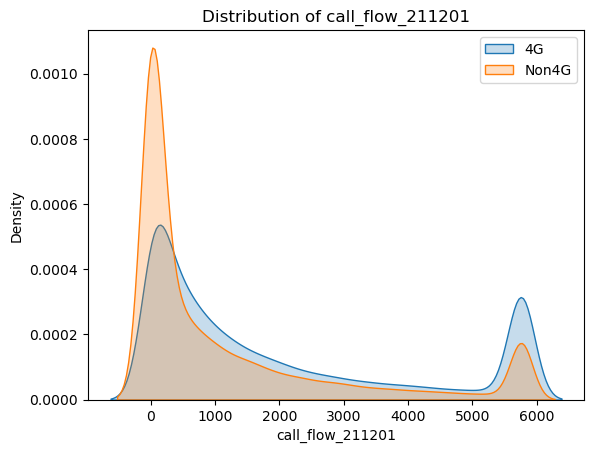

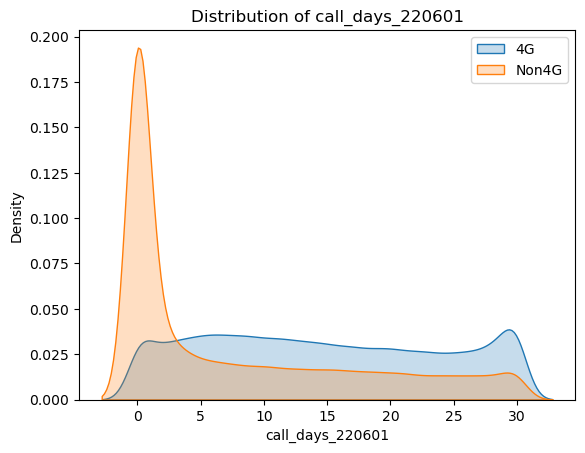

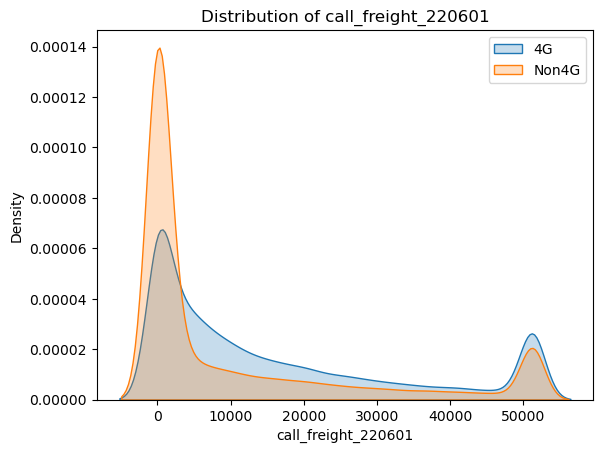

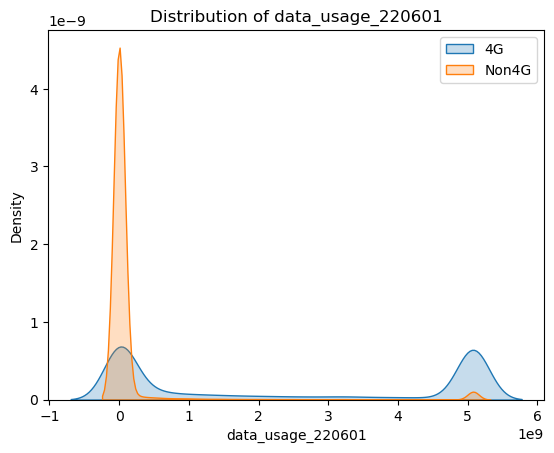

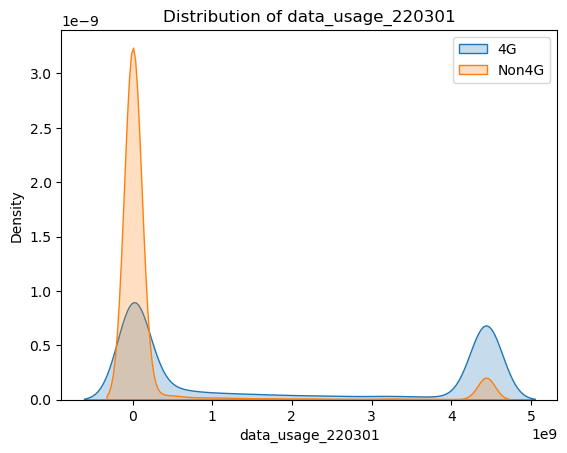

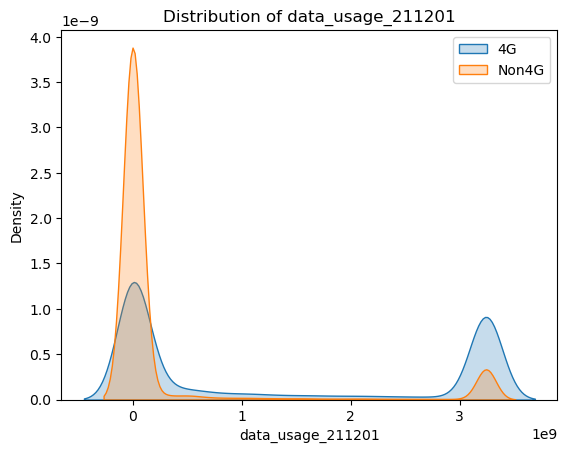

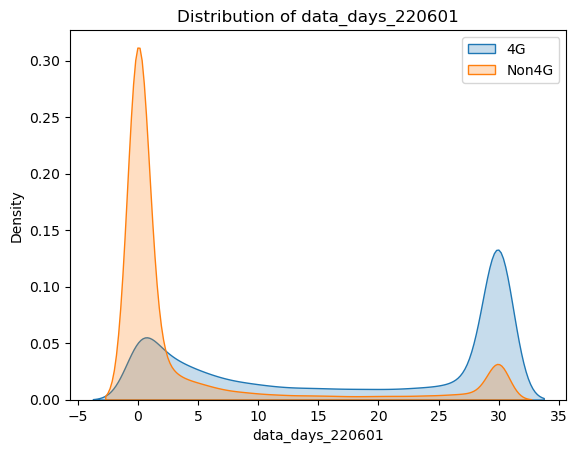

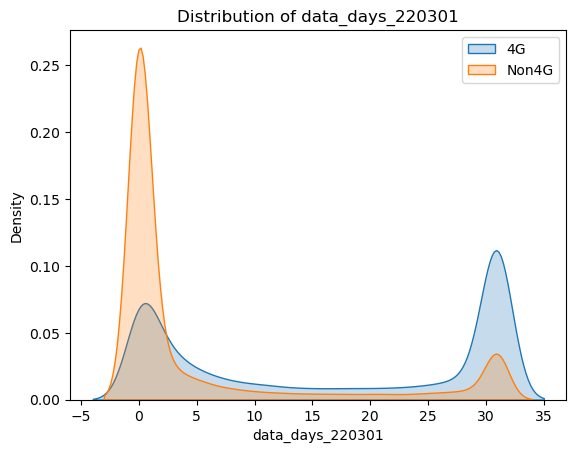

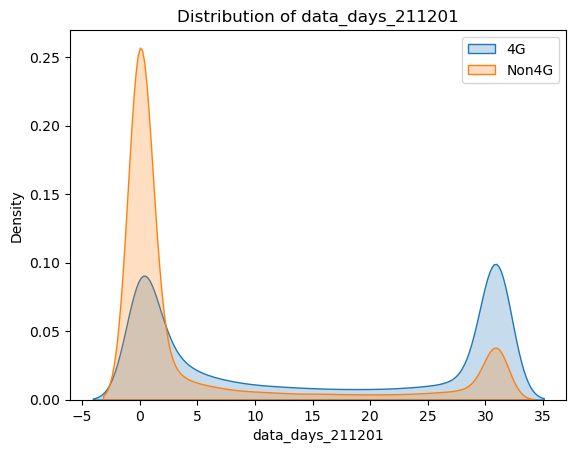

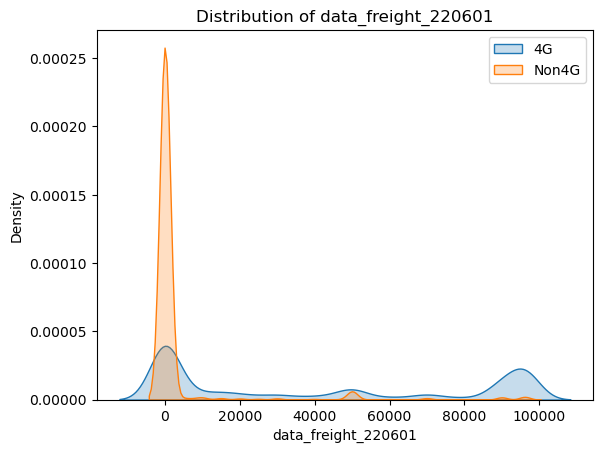

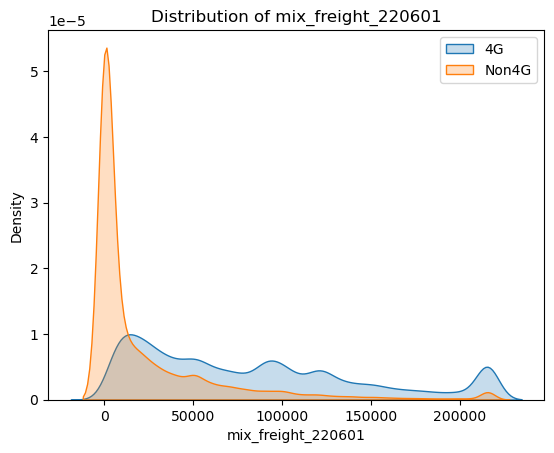

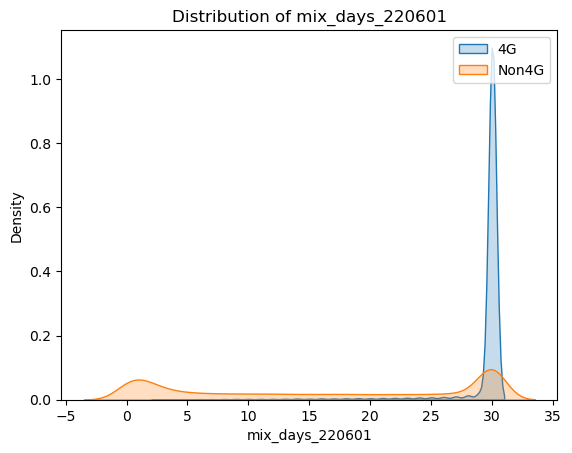

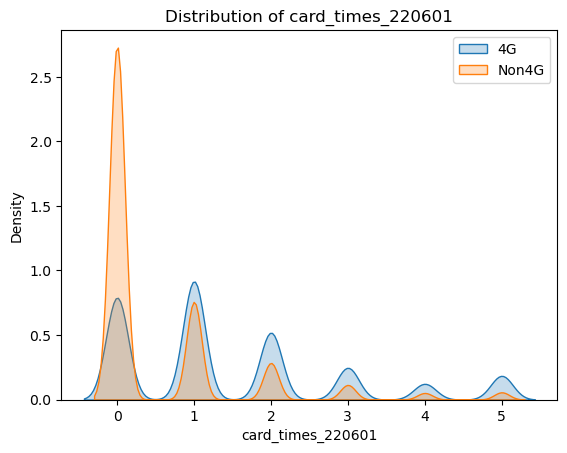

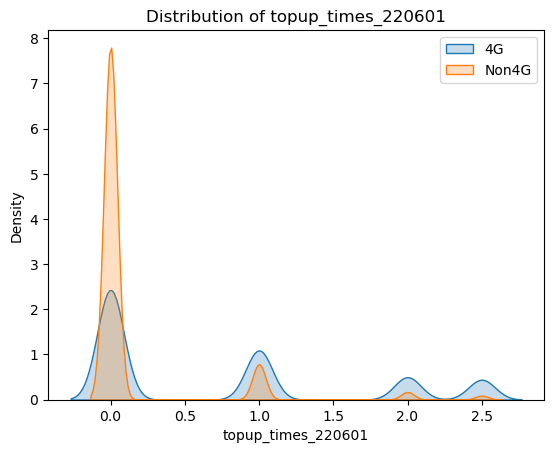

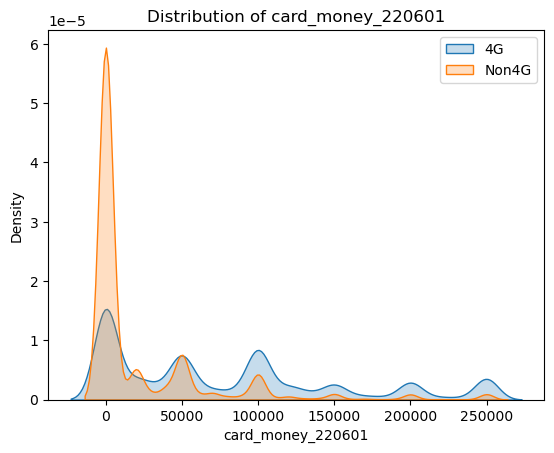

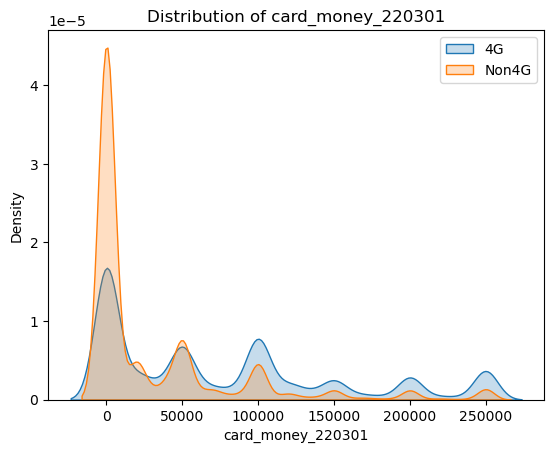

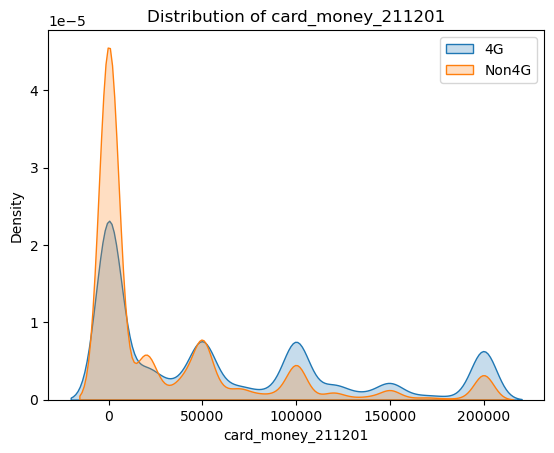

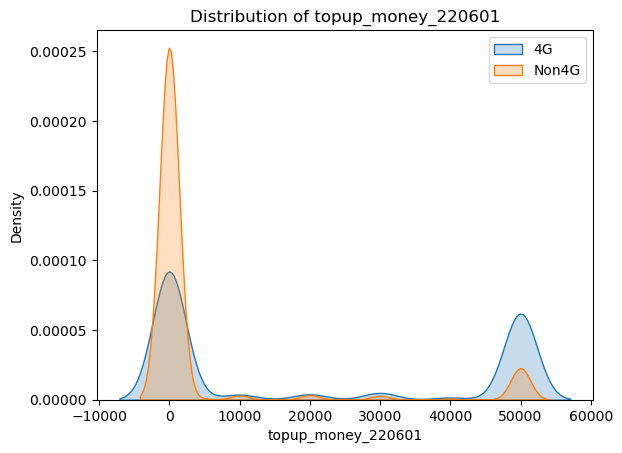

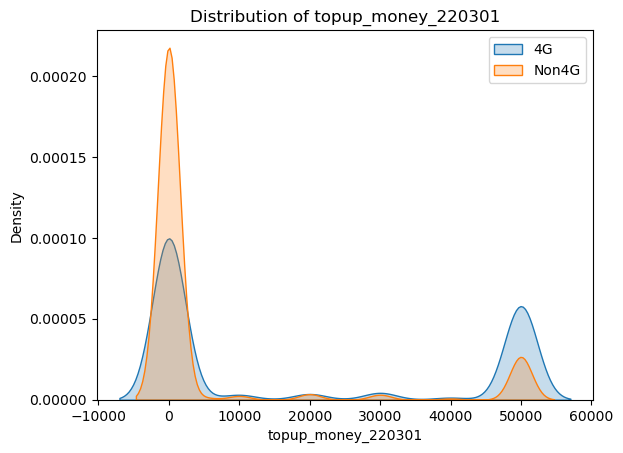

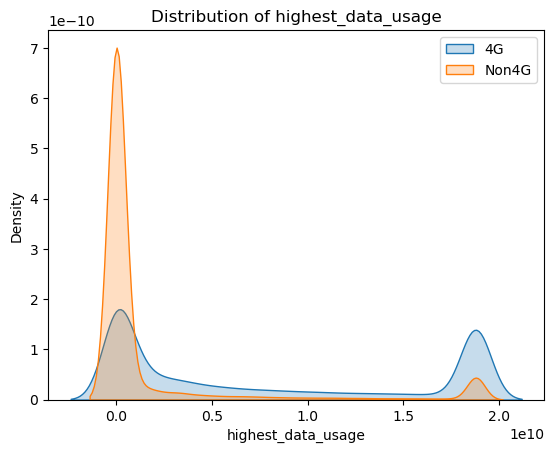

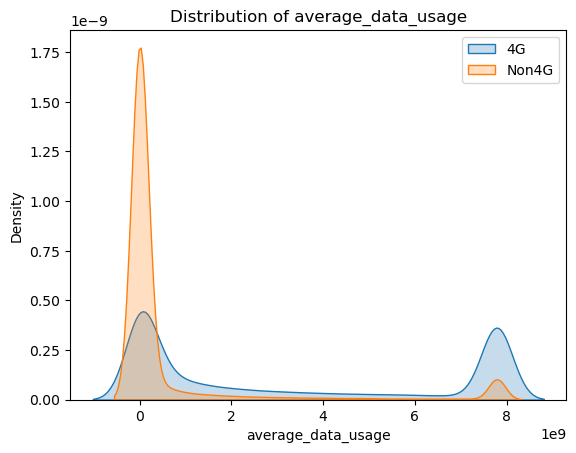

In [9]:
def KDEPlots(df1,df2,label1,label2,column):
    plt.figure()
    sns.kdeplot(data=df1,label=label1, shade=True)
    sns.kdeplot(data=df2,label=label2,shade=True)
    plt.legend()
    plt.title("Distribution of " +column)
    return

for column in numerical_columns:
    KDEPlots(data_4g[column],data_non4g[column],'4G','Non4G',column)

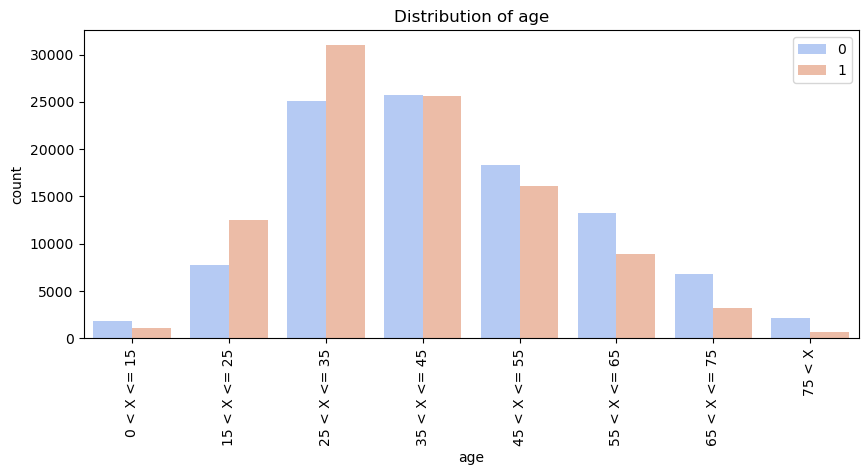

In [10]:
def DistPlot(df,hue,column):
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90)
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df, order=['0 < X <= 15', '15 < X <= 25', '25 < X <= 35', '35 < X <= 45'
                 , '45 < X <= 55', '55 < X <= 65', '65 < X <= 75', '75 < X'])
    plt.title("Distribution of " +column)
    plt.legend()
    return

for column in categorical_columns:
    DistPlot(data,'is_4g_220601',column)

In [11]:
prefix = ['age']
data = pd.get_dummies(data = data, prefix = prefix, prefix_sep = '_', 
                      columns = categorical_columns, drop_first = False, dtype = 'int')

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()

# Define the columns to be scaled
columns_to_scale = ["call_flow_220601", "call_flow_220301", "call_flow_211201", "data_freight_220601", "mix_freight_220601"
                    ,"call_freight_220601", "data_usage_220601", "data_usage_220301", "data_usage_211201"
                    , "card_money_220601", "card_money_220301", "card_money_211201", "topup_money_220601"
                    , "topup_money_220301", "data_days_220601", "data_days_220301", "data_days_211201"
                    , "call_days_220601", "mix_days_220601"
                   , 'highest_data_usage', 'average_data_usage', 'topup_times_220601', 'card_times_220601']
# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [13]:
data.describe()

,equip_220601,infrast_220601,Is_sim4g_220601,is_4g_220601,call_flow_220601,call_flow_220301,call_flow_211201,call_days_220601,call_freight_220601,data_usage_220601,data_usage_220301,data_usage_211201,data_days_220601,data_days_220301,data_days_211201,data_freight_220601,mix_freight_220601,mix_days_220601,card_times_220601,topup_times_220601,card_money_220601,card_money_220301,card_money_211201,topup_money_220601,topup_money_220301,highest_data_usage,average_data_usage,age_0 < X <= 15,age_15 < X <= 25,age_25 < X <= 35,age_35 < X <= 45,age_45 < X <= 55,age_55 < X <= 65,age_65 < X <= 75,age_75 < X
count,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000,199973.000000
mean,0.646677,0.629225,0.936796,0.495307,0.268021,0.269498,0.270697,0.366645,0.253298,0.246753,0.247969,0.248945,0.364883,0.354368,0.334148,0.222111,0.242222,0.750297,0.200518,0.171928,0.199207,0.211993,0.227656,0.248901,0.246328,0.249139,0.250451,0.014112,0.101134,0.280798,0.256710,0.172168,0.110730,0.050062,0.014287
std,0.478003,0.483014,0.243329,0.499979,0.338121,0.338633,0.338813,0.334173,0.333115,0.402026,0.405188,0.408159,0.425904,0.422578,0.419852,0.366866,0.282085,0.361430,0.263813,0.303649,0.274938,0.284075,0.309039,0.417233,0.416549,0.381151,0.389135,0.117953,0.301506,0.449390,0.436819,0.377528,0.313798,0.218073,0.118671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.003433,0.006317,0.007634,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012287,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.110662,0.111433,0.113289,0.300000,0.085298,0.000019,0.000018,0.000013,0.100000,0.096774,0.064516,0.000000,0.125281,1.000000,0.200000,0.000000,0.040000,0.080000,0.050000,0.000000,0.000000,0.002462,0.002166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.402060,0.403790,0.404580,0.633333,0.400000,0.400000,0.400000,0.400000,0.933333,0.903226,0.870968,0.400000,0.407372,1.000000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Predictor Selection

In [14]:
from scipy import stats
print('Setup Complete.')

Setup Complete.


In [15]:
pd.set_option('display.max_rows', 100)
corr = data.corr()
corr['is_4g_220601'].sort_values()

age_65 < X <= 75      -0.078544
age_55 < X <= 65      -0.066857
age_75 < X            -0.061786
age_0 < X <= 15       -0.029827
age_45 < X <= 55      -0.025431
age_35 < X <= 45       0.004520
age_25 < X <= 35       0.071455
age_15 < X <= 25       0.081171
call_freight_220601    0.162695
call_flow_211201       0.200453
call_flow_220301       0.214295
card_money_211201      0.234113
Is_sim4g_220601        0.251235
call_flow_220601       0.278513
topup_money_220301     0.302384
card_money_220301      0.314482
card_times_220601      0.355646
call_days_220601       0.361578
data_days_211201       0.365811
topup_times_220601     0.370675
topup_money_220601     0.373499
data_usage_211201      0.384463
card_money_220601      0.397621
highest_data_usage     0.425258
data_usage_220301      0.430638
data_days_220301       0.434773
average_data_usage     0.440109
mix_freight_220601     0.488240
data_freight_220601    0.515505
data_days_220601       0.530854
data_usage_220601      0.535129
equip_22

In [16]:
data.dtypes

equip_220601             int64
infrast_220601           int64
Is_sim4g_220601          int64
is_4g_220601             int64
call_flow_220601       float64
call_flow_220301       float64
call_flow_211201       float64
call_days_220601       float64
call_freight_220601    float64
data_usage_220601      float64
data_usage_220301      float64
data_usage_211201      float64
data_days_220601       float64
data_days_220301       float64
data_days_211201       float64
data_freight_220601    float64
mix_freight_220601     float64
mix_days_220601        float64
card_times_220601      float64
topup_times_220601     float64
card_money_220601      float64
card_money_220301      float64
card_money_211201      float64
topup_money_220601     float64
topup_money_220301     float64
highest_data_usage     float64
average_data_usage     float64
age_0 < X <= 15          int32
age_15 < X <= 25         int32
age_25 < X <= 35         int32
age_35 < X <= 45         int32
age_45 < X <= 55         int32
age_55 <

In [17]:
data.corr()

,equip_220601,infrast_220601,Is_sim4g_220601,is_4g_220601,call_flow_220601,call_flow_220301,call_flow_211201,call_days_220601,call_freight_220601,data_usage_220601,data_usage_220301,data_usage_211201,data_days_220601,data_days_220301,data_days_211201,data_freight_220601,mix_freight_220601,mix_days_220601,card_times_220601,topup_times_220601,card_money_220601,card_money_220301,card_money_211201,topup_money_220601,topup_money_220301,highest_data_usage,average_data_usage,age_0 < X <= 15,age_15 < X <= 25,age_25 < X <= 35,age_35 < X <= 45,age_45 < X <= 55,age_55 < X <= 65,age_65 < X <= 75,age_75 < X
equip_220601,1.000000,0.696057,0.161457,0.535238,0.048115,0.026821,0.030712,0.068443,-0.043267,0.313257,0.283217,0.262397,0.348483,0.297887,0.250631,0.258325,0.182728,0.514747,0.120482,0.176358,0.149006,0.121655,0.096142,0.172811,0.146536,0.291738,0.291586,-0.035293,0.059146,0.052979,0.038579,-0.016556,-0.065957,-0.088601,-0.067930
infrast_220601,0.696057,1.000000,0.278168,0.760190,0.102465,0.071832,0.074174,0.126597,-0.018562,0.442344,0.387878,0.357309,0.494808,0.416544,0.348447,0.372279,0.287873,0.709446,0.189432,0.250550,0.233077,0.196515,0.149808,0.243071,0.211173,0.399636,0.403376,-0.028937,0.087856,0.084775,0.023790,-0.036626,-0.088287,-0.097950,-0.073082
Is_sim4g_220601,0.161457,0.278168,1.000000,0.251235,0.077960,0.073358,0.072624,0.092641,0.021101,0.140297,0.137836,0.135474,0.157751,0.151194,0.137609,0.119110,0.106821,0.208507,0.082945,0.088161,0.088217,0.088598,0.077741,0.087507,0.083298,0.147869,0.146832,-0.004641,0.040299,0.008552,-0.006937,-0.000216,-0.009070,-0.024905,-0.034190
is_4g_220601,0.535238,0.760190,0.251235,1.000000,0.278513,0.214295,0.200453,0.361578,0.162695,0.535129,0.430638,0.384463,0.530854,0.434773,0.365811,0.515505,0.488240,0.610604,0.355646,0.370675,0.397621,0.314482,0.234113,0.373499,0.302384,0.425258,0.440109,-0.029827,0.081171,0.071455,0.004520,-0.025431,-0.066857,-0.078544,-0.061786
call_flow_220601,0.048115,0.102465,0.077960,0.278513,1.000000,0.766203,0.703138,0.853791,0.540050,0.264028,0.199839,0.179572,0.245412,0.197246,0.181144,0.378369,0.602059,0.366061,0.418254,0.296815,0.493012,0.400582,0.326781,0.335369,0.277458,0.172543,0.192938,-0.044469,-0.067941,0.006289,0.023874,0.032831,0.012107,-0.006824,-0.018795
call_flow_220301,0.026821,0.071832,0.073358,0.214295,0.766203,1.000000,0.760597,0.696242,0.355090,0.217252,0.232091,0.192270,0.203531,0.214285,0.187562,0.320370,0.461410,0.290513,0.309623,0.226913,0.380058,0.498749,0.358163,0.263989,0.325744,0.185175,0.207031,-0.042212,-0.070230,0.003191,0.020958,0.030973,0.017359,-0.001198,-0.011078
call_flow_211201,0.030712,0.074174,0.072624,0.200453,0.703138,0.760597,1.000000,0.637960,0.317812,0.202661,0.203881,0.244597,0.192138,0.195623,0.228516,0.298735,0.427892,0.266345,0.284189,0.211394,0.356801,0.395628,0.472038,0.248055,0.266298,0.183868,0.201995,-0.040638,-0.070325,0.008824,0.024892,0.030747,0.010956,-0.008667,-0.016834
call_days_220601,0.068443,0.126597,0.092641,0.361578,0.853791,0.696242,0.637960,1.000000,0.604128,0.266515,0.190869,0.165543,0.255888,0.192851,0.167431,0.372614,0.592267,0.463410,0.442932,0.324427,0.487250,0.406948,0.332494,0.359302,0.301951,0.156153,0.178326,-0.064331,-0.050239,0.001736,0.003270,0.043209,0.029757,-0.008462,-0.027621
call_freight_220601,-0.043267,-0.018562,0.021101,0.162695,0.540050,0.355090,0.317812,0.604128,1.000000,-0.022080,-0.061009,-0.066851,0.007694,-0.024787,-0.033663,0.006967,0.463214,0.262469,0.407772,0.218903,0.404120,0.282860,0.232556,0.233836,0.160484,-0.075724,-0.072667,-0.051261,-0.057392,-0.019230,-0.011043,0.041574,0.048079,0.026198,0.002701
data_usage_220601,0.313257,0.442344,0.140297,0.535129,0.264028,0.217252,0.202661,0.266515,-0.022080,1.000000,0.725796,0.633695,0.704403,0.575808,0.504513,0.800115,0.615154,0.386728,0.406695,0.408018,0.501446,0.412262,0.300792,0.395647,0.333105,0.748219,0.780188,-0.002445,0.127958,0.098937,-0.010783,-0.063305,-0.099106,-0.080350,-0.046533


In [18]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include='number')

# Create a correlation matrix for the numerical columns
corr_matrix = numerical_cols.corr()

# Select only correlations > 0.7 and not equal to 1 (to exclude self-correlations)
corr_pairs = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)]

# Print out the pairs of columns that meet the correlation threshold
for col1, col2 in corr_pairs.stack().index:
    print(f"{col1} and {col2} have a correlation of {corr_pairs.loc[(col1, col2)]}.")


infrast_220601 and is_4g_220601 have a correlation of 0.7601897375969439.
infrast_220601 and mix_days_220601 have a correlation of 0.7094457219235695.
is_4g_220601 and infrast_220601 have a correlation of 0.7601897375969439.
call_flow_220601 and call_flow_220301 have a correlation of 0.7662034956984483.
call_flow_220601 and call_flow_211201 have a correlation of 0.7031381537442272.
call_flow_220601 and call_days_220601 have a correlation of 0.8537914234733842.
call_flow_220301 and call_flow_220601 have a correlation of 0.7662034956984483.
call_flow_220301 and call_flow_211201 have a correlation of 0.7605965734502395.
call_flow_211201 and call_flow_220601 have a correlation of 0.7031381537442272.
call_flow_211201 and call_flow_220301 have a correlation of 0.7605965734502395.
call_days_220601 and call_flow_220601 have a correlation of 0.8537914234733842.
data_usage_220601 and data_usage_220301 have a correlation of 0.725795673505555.
data_usage_220601 and data_days_220601 have a correlat

ta sẽ chọn: call_days_220601,data_days_220601,data_usage_220601,mix_freight_220601,card_times_220601,card_money_220601, topup_money_220601, average_data_usage, call_freight_220601, Is_sim4g_220601, infrast_220601, equip_220601 là các biến predictors

In [19]:
predictors = ['call_days_220601', 'data_days_220601', 'data_usage_220601', 'mix_freight_220601',
              'card_times_220601', 'card_money_220601', 'topup_money_220601', 'average_data_usage', 
              'call_freight_220601','infrast_220601', 'Is_sim4g_220601', 'equip_220601']
P_values = []
for i in predictors:
    pearson_coef, p_value = stats.pearsonr(data[i], data['is_4g_220601'])
    P_values.append(p_value)
P_values

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

<h2> Predictive Model

We have divided the dataset into 2 sets, including training data and testing data. In which, training data accounts for 80% and testing data accounts for 20% of dataset. We have scaled the dataset according to the distribution of values in the target 'is_4g_220601'

In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2, stratify = data['is_4g_220601'], random_state = 999)

In [21]:
data_train['is_4g_220601'].value_counts()

0    80740
1    79238
Name: is_4g_220601, dtype: int64

In [22]:
data_test['is_4g_220601'].value_counts()

0    20185
1    19810
Name: is_4g_220601, dtype: int64

<h2> Run the Model

We used 4 popular algorithms to solve the Classification problem as following

<li>K-Nearest Neighbors</li>
<li>Logistic Regression</li>
<li>Naïve Bayes</li>
<li>Support Vector Machines</li>

In [23]:
predictors = ['call_days_220601', 'data_days_220601', 'data_usage_220601', 'mix_freight_220601',
              'card_times_220601', 'card_money_220601', 'topup_money_220601', 'average_data_usage', 
              'call_freight_220601','infrast_220601', 'Is_sim4g_220601', 'equip_220601']
Evaluation = []

In [31]:
model = ['Knn', 'LR', 'NB', 'SVM']
def run_model(model, data_train, data_test, i, z):
    x_train = data_train[predictors]
    y_train = data_train['is_4g_220601']
    x_test = data_test[predictors]
    y_test = data_test['is_4g_220601']

    poly = PolynomialFeatures(degree = i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    
    model.fit(x_train_poly, y_train)
    y_pred = model.predict(x_test_poly)
    
    
    if z == 'score':
        return Evaluation.append(['model', round(f1_score(y_test, y_pred),2), round(accuracy_score(y_test, y_pred),2), 
                                      round(roc_auc_score(y_test, y_pred),2)])
    else:
        return ConfusionMatrixDisplay.from_estimator(model, x_test_poly, y_test); plt.title('Confusion Matrix' + data_train)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
kNN_ros = KNeighborsClassifier(n_neighbors=2, p = 2, algorithm = 'brute', metric='minkowski')
LR_ros = LogisticRegression(max_iter = 4000, C = 1000)
NB_ros = GaussianNB()
SVM_ros = SVC(kernel='rbf')

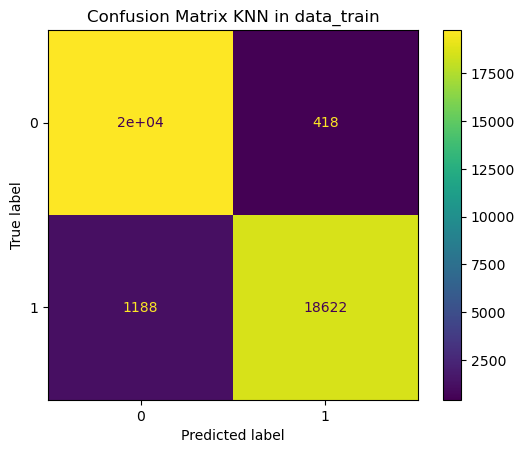

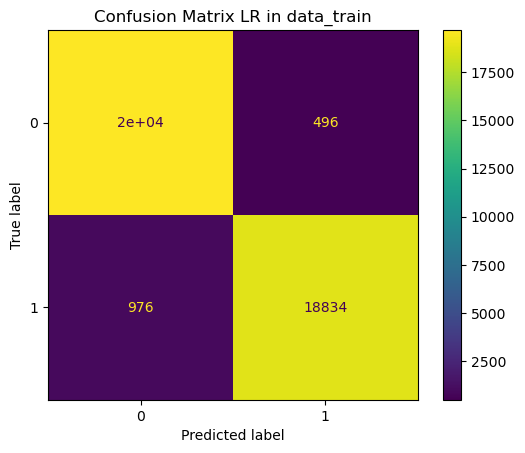

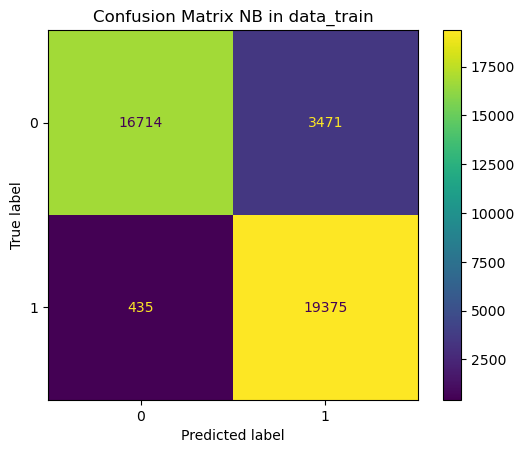

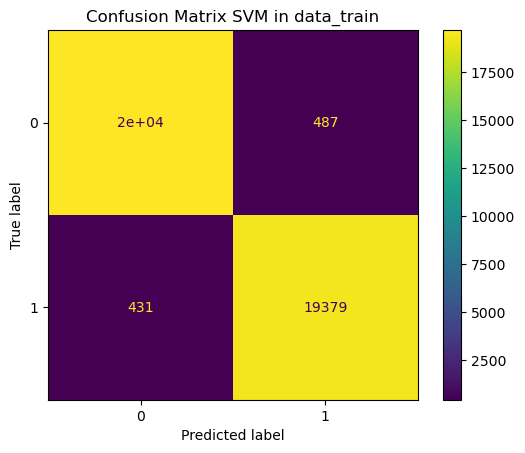

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
# Example usage for kNN_ros
run_model(kNN_ros, data_train, data_test, 1, 'confusion_matrix')
plt.title('Confusion Matrix KNN in data_train')
plt.show()

# Example usage for LR_ros
run_model(LR_ros, data_train, data_test, 1, 'confusion_matrix')
plt.title('Confusion Matrix LR in data_train')
plt.show()

# Example usage for NB_ros
run_model(NB_ros, data_train, data_test, 1, 'confusion_matrix')
plt.title('Confusion Matrix NB in data_train')
plt.show()

# Example usage for SVM_ros
run_model(SVM_ros, data_train, data_test, 1, 'confusion_matrix')
plt.title('Confusion Matrix SVM in data_train')
plt.show()

In [34]:
run_model(kNN_ros, data_train, data_test, 1, 'score')
run_model(LR_ros, data_train, data_test, 1, 'score')
run_model(NB_ros, data_train, data_test, 1, 'score')
run_model(SVM_ros, data_train, data_test, 1, 'score')
Evaluation = pd.DataFrame(Evaluation, columns = ['model', 'F1-score', 'Accuracy', 'AUC'])
Evaluation

,model,F1-score,Accuracy,AUC
0,model,0.96,0.96,0.96
1,model,0.96,0.96,0.96
2,model,0.91,0.90,0.90
3,model,0.98,0.98,0.98
